# This program plot the insurance data into graphs.

In [17]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read csv as a DataFrame
ins_df = pd.read_csv('insurance.csv')

### Prepare the dataset

In [18]:
#Drop duplicates & Null & filter out age>60
ins_df = ins_df.drop_duplicates()
ins_df = ins_df.dropna()
ins_df = ins_df[(ins_df.age <= 60)]

#reset index
ins_df = ins_df.rename_axis('index1').reset_index()
print(ins_df.describe())

            index1          age          bmi     children       charges
count  1246.000000  1246.000000  1246.000000  1246.000000   1246.000000
mean    670.985554    37.523274    30.533571     1.127608  12710.624044
std     387.143716    13.005060     6.113015     1.208640  11934.523155
min       0.000000    18.000000    15.960000     0.000000   1121.873900
25%     331.500000    26.000000    26.125000     0.000000   4501.420038
50%     675.500000    37.500000    30.200000     1.000000   8610.758700
75%    1007.750000    49.000000    34.422500     2.000000  16281.596250
max    1336.000000    60.000000    53.130000     5.000000  63770.428010


### Scatterplots & Regression Models

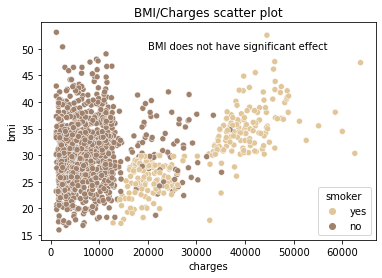

In [19]:
#Scatter plot of BMI/Charges
sns.scatterplot(
    data=ins_df, x="charges", y="bmi",hue='smoker',
    palette = ['#E1C699','#A0816C'])

plt.text(20000, 50, "BMI does not have significant effect",
         horizontalalignment='left',
         size='medium',
         color='black',
         weight='roman')
plt.title("BMI/Charges scatter plot")
plt.show()

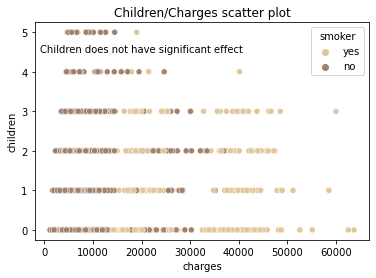

In [20]:
#Scatter plot of Children/Charges
sns.scatterplot(
    data=ins_df, x="charges", y="children",hue='smoker',
    palette = ['#E1C699','#A0816C'])
plt.text(20000, 4.5, "Children does not have significant effect",
         horizontalalignment='center',
         size='medium',
         color='black',
         weight='roman')
plt.title("Children/Charges scatter plot")
plt.show()

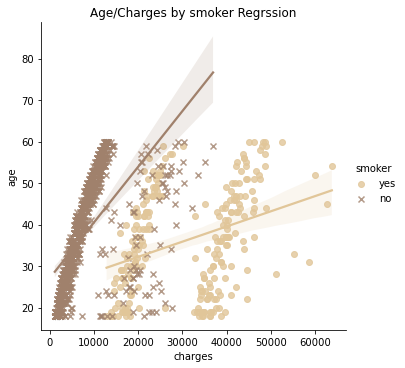

In [21]:
#Regression model age/Charges by smoker
ax = sns.lmplot(x = 'charges',y = 'age',
                markers = ['o','x'], hue = 'smoker',
                palette = ['#E1C699','#A0816C'],
                data = ins_df,
                ci = 99)
plt.title("Age/Charges by smoker Regrssion")
plt.show()

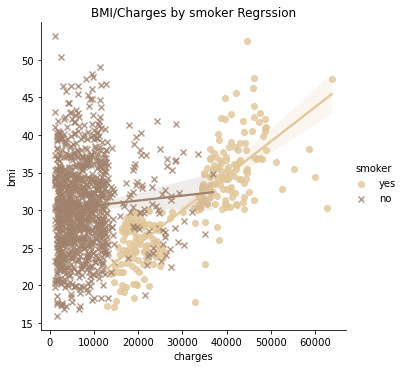

In [22]:
#Regression model BMI/Charges by smoker
ax = sns.lmplot(x = 'charges',y = 'bmi',
                markers = ['o','x'], hue = 'smoker',
                palette = ['#E1C699','#A0816C'],
                data = ins_df,
                ci = 99)
plt.title("BMI/Charges by smoker Regrssion")
plt.show()

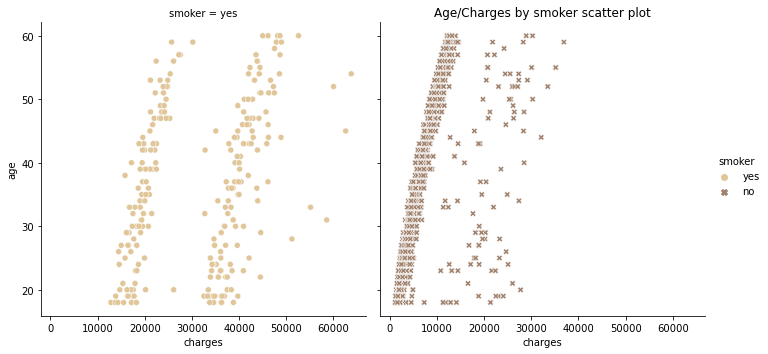

In [23]:
#Scatter plot age/Charges by smoker
sns.relplot(
    data=ins_df, x="charges", y="age",
    col="smoker",hue="smoker",style ="smoker",
    palette = ['#E1C699','#A0816C'],
    kind="scatter")
plt.title("Age/Charges by smoker scatter plot")
plt.show()

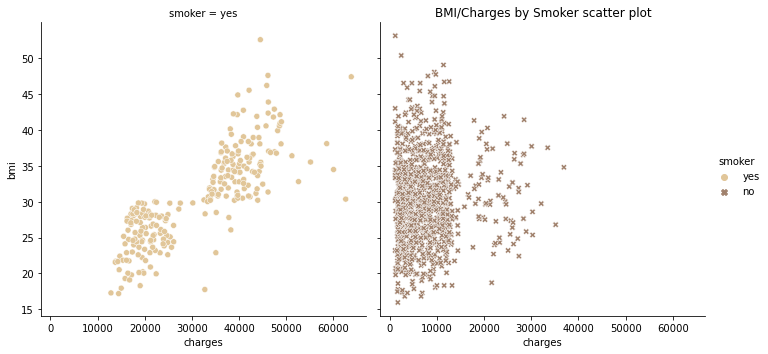

In [24]:
#Scatter plot BMI/Charges by smoker
sns.relplot(
    data=ins_df, x="charges", y="bmi",
    col="smoker",hue="smoker",style ="smoker",
    palette = ['#E1C699','#A0816C'],
    kind="scatter")
plt.title("BMI/Charges by Smoker scatter plot")
plt.show()

### Distribution & Histogram

/Users/austinfang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/austinfang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


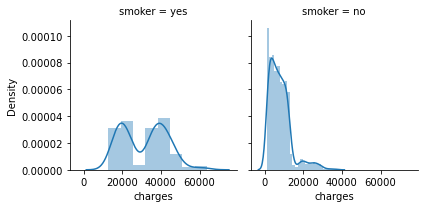

In [40]:
#Map different charges for smoker
FacGr = sns.FacetGrid(ins_df, col = 'smoker')
ax = FacGr.map(sns.distplot, 'charges')
plt.show()

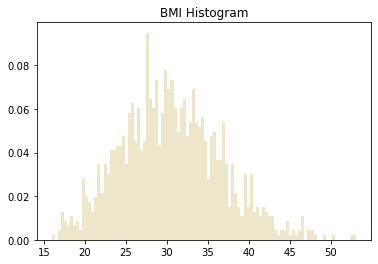

In [27]:
#histogram of bmi
plt.hist(ins_df.bmi, 100,density = 1,color ='#E8DCB5',alpha = 0.7)
plt.title("BMI Histogram")
plt.show()

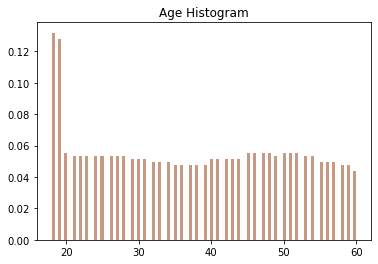

In [28]:
#histogram of age
plt.hist(ins_df['age'], 100,density = 1, color ='#AE6E4E',alpha = 0.7)
plt.title("Age Histogram")
plt.show()

### Bar Charts

In [30]:
#Capitalize the first letter
ins_df.region = ins_df.region.str.capitalize()

#Group the DataFrame by region, average charges
df2 = ins_df.groupby('region')['charges'].mean().reset_index()
print(df2)

      region       charges
0  Northeast  12983.711613
1  Northwest  11952.395477
2  Southeast  14093.931455
3  Southwest  11643.099465


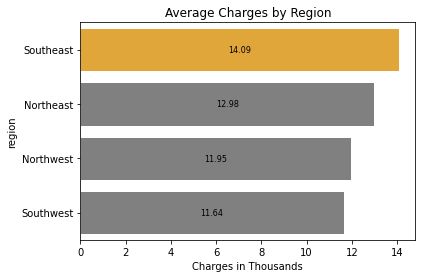

In [31]:
#Average Charges by region horizontal bar
clrs = ['#FCAE1E','grey','grey','grey']
df2 = df2.sort_values('charges', ascending=False)
df2['charges']=df2['charges']/1000
bar = sns.barplot(x = 'charges' , y = df2.region,
                  data = df2,
                  orient = 'h',
                  palette = clrs, edgecolor = 'w')
plt.xlabel('Charges in Thousands')


for i in bar.containers:
    bar.bar_label(i,size=8,fmt='%.2f',label_type='center')
plt.title('Average Charges by Region')
plt.show()

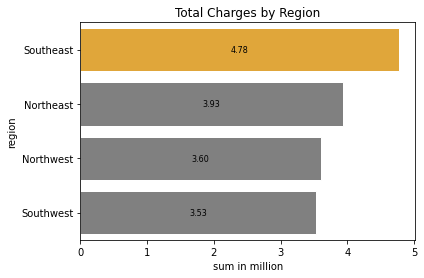

In [32]:
#Group by region, sum of charges
df2 = ins_df.groupby('region')['charges'].agg(['sum']).reset_index()

#SUM Charges by region horizontal bar
df2['sum']=df2["sum"]/1000000
clrs = ['#FCAE1E','grey','grey','grey']
df2 = df2.sort_values('sum', ascending=False)
bar = sns.barplot(x = 'sum' , y = df2.region,
                  data = df2,
                  orient = 'h',
                  palette = clrs , edgecolor = 'w')
plt.xlabel('sum in million')

for i in bar.containers:
    bar.bar_label(i,size=8,fmt='%.2f',label_type='center')
plt.title('Total Charges by Region')
plt.show()

      region  smoker
0  Northeast      63
1  Northwest      53
2  Southeast      83
3  Southwest      53


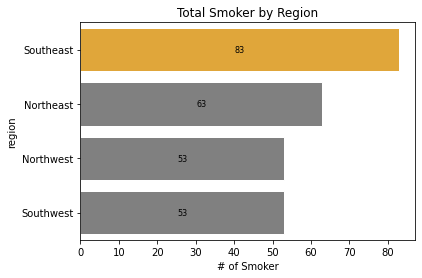

In [33]:
#Group by region, cnt smoker
df3 = ins_df.groupby('region')['smoker'].apply(lambda x:(x=='yes').sum()).reset_index()
print(df3)

#Smoker by region horizontal bar
clrs = ['grey' if (x < max('somker')) else '#FCAE1E' for x in 'smoker' ]
df3 = df3.sort_values('smoker', ascending=False)
bar = sns.barplot(x = 'smoker' , y = df3.region,
                  data = df3,
                  orient = 'h',
                  palette = clrs , edgecolor = 'w')
plt.xlabel('# of Smoker')

for i in bar.containers:
    bar.bar_label(i,size=8,fmt='%g',label_type='center')
plt.title('Total Smoker by Region')
plt.show()


      region        bmi
0  Northeast  29.019208
1  Northwest  29.143854
2  Southeast  33.302094
3  Southwest  30.331023


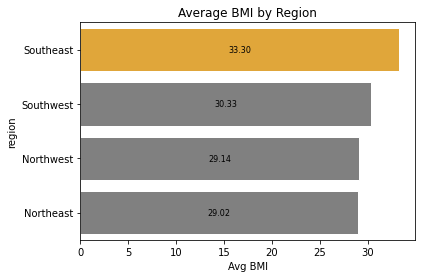

In [34]:
#Group by by region, average BMI
df4 = ins_df.groupby('region')['bmi'].mean().reset_index()
print(df4)

#Average BMI by region horizontal bar
df4 = df4.sort_values('bmi', ascending=False)
clrs = ['#FCAE1E','grey','grey','grey']

bar = sns.barplot(x = 'bmi' , y = df4.region,
                  data = df4,
                  orient = 'h',
                  palette = clrs , edgecolor = 'w')
plt.xlabel('Avg BMI')

for i in bar.containers:
    bar.bar_label(i,size=8,fmt='%.2f',label_type='center')
plt.title('Average BMI by Region')
plt.show()

##### Turn bmi & age into categorical data

In [35]:
#categorize the bmi/ age groups into df using bins=[]
ins_df.bmi = pd.cut(ins_df.bmi, bins=[0, 18.5, 25, 30, 100], include_lowest=True, labels=['Underweight', 'Healthy weight', 'Overweight', 'Obesity'])
ins_df.age = pd.cut(ins_df.age, bins=[0, 27, 45, 57, 60], include_lowest=True, labels=['Gen Z','Millennials', 'Gen X', 'Baby Boomers'])
print(ins_df.head())

   index1          age     sex             bmi  children smoker     region  \
0       0        Gen Z  female      Overweight         0    yes  Southwest   
1       1        Gen Z    male         Obesity         1     no  Southeast   
2       2  Millennials    male         Obesity         3     no  Southeast   
3       3  Millennials    male  Healthy weight         0     no  Northwest   
4       4  Millennials    male      Overweight         0     no  Northwest   

       charges  
0  16884.92400  
1   1725.55230  
2   4449.46200  
3  21984.47061  
4   3866.85520  


            age    charges
3  Baby Boomers  18.149268
2         Gen X  15.948125
1   Millennials  12.315263
0         Gen Z   9.118853


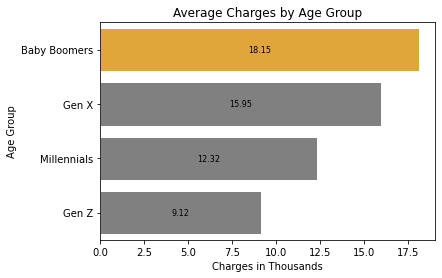

In [37]:
#Group by age, average of charges
df5 = ins_df.groupby('age')['charges'].mean().reset_index()

df5['charges']=df5['charges']/1000

#Average charges by age group horizontal bar

df5 = df5.sort_values('charges',ascending=False)
print(df5)

clrs = ['#FCAE1E','grey','grey','grey']
bar = sns.barplot(x = 'charges' , y = 'age',
                  data = df5,
                  orient = 'h',
                  palette = clrs, edgecolor = 'w',
                  order=df5.sort_values('charges',ascending = False).age)
plt.xlabel('Charges in Thousands')
plt.ylabel('Age Group')


for i in bar.containers:
    bar.bar_label(i,size=8,fmt='%.2f',label_type='center')
plt.title('Average Charges by Age Group')
plt.show()

              bmi    charges
3         Obesity  15.000466
2      Overweight  10.503715
1  Healthy weight  10.067245
0     Underweight   8.657621


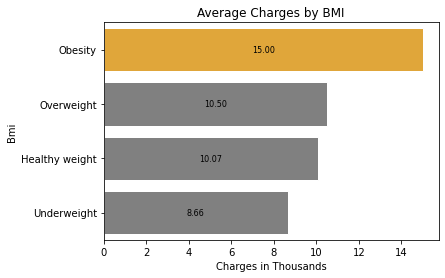

In [38]:
#Group by bmi, average charges
df5 = ins_df.groupby('bmi')['charges'].mean().reset_index()

df5['charges']=df5['charges']/1000
#Average charges by bmi group horizontal bar

df5 = df5.sort_values('charges',ascending=False)
print(df5)

clrs = ['#FCAE1E','grey','grey','grey']
bar = sns.barplot(x = 'charges' , y = 'bmi',
                  data = df5,
                  orient = 'h',
                  palette = clrs, edgecolor = 'w',
                  order=df5.sort_values('charges',ascending = False).bmi)
plt.xlabel('Charges in Thousands')
plt.ylabel('Bmi')

for i in bar.containers:
    bar.bar_label(i,size=8,fmt='%.2f',label_type='center')
plt.title('Average Charges by BMI')
plt.show()

### Pie Charts

Millennials     38.20
Gen Z           28.97
Gen X           26.97
Baby Boomers     5.86
Name: age, dtype: float64


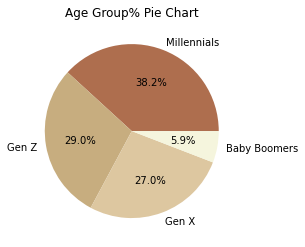

In [39]:
#pie chart age group
a = ins_df['age'].value_counts()
a = round(a/sum(a)*100,2)
print(a)

colors = ['#AE6E4E','#C7AD7F','#DDC7A0','#F5F5DD']
a.plot(
    kind='pie', y='age', autopct='%1.1f%%',
  colors=colors,label='')
plt.title("Age Group% Pie Chart")
plt.show()


Obesity           51.44
Overweight        29.61
Healthy weight    17.26
Underweight        1.69
Name: bmi, dtype: float64


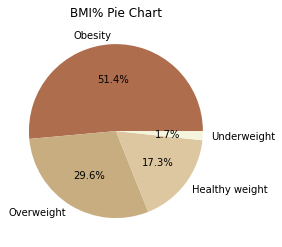

In [41]:
#pie chart bmi group
a = ins_df['bmi'].value_counts()
a = round(a/sum(a)*100,2)
print(a)

colors = ['#AE6E4E','#C7AD7F','#DDC7A0','#F5F5DD']
a.plot(
    kind='pie', y='bmi', autopct='%1.1f%%',
  colors=colors, label='')
plt.title("BMI% Pie Chart")
plt.show()